<a href="https://colab.research.google.com/github/aldimastro/Spotify_Hits/blob/main/Entrenamiento_ML_Laverne_Mastrodonato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿Qué características hacen que los tracks de Spotify sean éxitos?**

***ACLARACIÓN:*** En la notebook "Unión de bases y guardado" se puede encontrar la obtención y tratamiento de las dos bases con la unión de las mismas. Luego la descargamos y la subimos a github para poder ahorrarnos tiempo en la ejecución del código y concentrarnos en la evaluación del modelo de machine learning.

In [ ]:
#Importo librerias Necesarias
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/aldimastro/Spotify_Hits/main/base.csv'
base = pd.read_csv(url, index_col=0)
base.head(5)

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,duration_min
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,11.462446
11,0.989,"['Frédéric Chopin', 'Vladimir Horowitz']",0.170,0.0823,0,6QIONtzbQCbnmWNwn0H1yT,0.911,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,0.0317,85.989,0.3460,1928,1.418912
40,0.977,"['Frédéric Chopin', 'Vladimir Horowitz']",0.305,0.0830,0,6duqhjENDYbR2Q4Hpogh9M,0.697,6,0.2310,-20.895,1,"Nocturne in F-Sharp Major, Op. 15, No. 2",1,0.0331,80.622,0.0479,1928,3.587855
42,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.337,0.0699,0,6hUMURfCaJ6JB8EWL1ZLr7,0.903,5,0.1060,-23.806,0,"Nocturne F Minor, Op. 55, No. 1",2,0.0322,72.133,0.1350,1928,5.565228
47,0.985,"['Frédéric Chopin', 'Vladimir Horowitz']",0.355,0.0452,0,6j8nMxm9yFxN3Mdodm9tEl,0.825,1,0.1530,-24.125,1,"Mazurka in F Minor, Op. 7, No. 3",2,0.0329,84.551,0.2760,1928,2.300263


Vemos la cantidad, los tipos de datos de la base y si existen nulos:

In [ ]:
base.shape

(149844, 18)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149844 entries, 4 to 9987
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      149844 non-null  float64
 1   artists           149844 non-null  object 
 2   danceability      149844 non-null  float64
 3   energy            149844 non-null  float64
 4   explicit          149844 non-null  int64  
 5   id                149844 non-null  object 
 6   instrumentalness  149844 non-null  float64
 7   key               149844 non-null  int64  
 8   liveness          149844 non-null  float64
 9   loudness          149844 non-null  float64
 10  mode              149844 non-null  int64  
 11  name              149844 non-null  object 
 12  popularity        149844 non-null  int64  
 13  speechiness       149844 non-null  float64
 14  tempo             149844 non-null  float64
 15  valence           149844 non-null  float64
 16  year              1498

Observamos los valores mínimos, máximos, cuartiles, medias y desvíos de cada característica de los tracks:

In [ ]:
base.describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_min
count,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000
mean,0.411389,0.549448,0.539187,0.084715,0.122239,5.203992,0.202196,-10.453799,0.709525,38.135788,0.077391,118.752616,0.538614,1984.868710,3.900155
std,0.353031,0.172854,0.259809,0.278458,0.273376,3.521618,0.177389,5.313666,0.453983,18.373214,0.101618,30.174960,0.259938,21.844122,1.818484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1921.000000,0.245138
25%,0.058400,0.434000,0.334000,0.000000,0.000000,2.000000,0.095200,-13.243250,0.000000,25.000000,0.034000,95.654500,0.331000,1968.000000,2.932892
50%,0.335000,0.559000,0.552000,0.000000,0.000074,5.000000,0.131000,-9.551000,1.000000,39.000000,0.043400,116.524500,0.548000,1986.000000,3.604797
75%,0.759000,0.674000,0.753000,0.000000,0.020300,8.000000,0.254000,-6.517000,1.000000,51.000000,0.069800,137.165000,0.755000,2004.000000,4.440089
max,0.996000,0.988000,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.968000,244.091000,1.000000,2022.000000,90.060135


## Entrenando un algoritmo de Machine Learning

A partir de los datos obtenidos, vamos a buscar realizar un modelo que logre predecir un éxito a partir de las características más relevantes.

Decidimos clasificar los tracks en éxitos (1) o no éxitos (0). Para esto, definimos que un track se considera un éxito en base a la variable popularidad. 

Adicionalmente, decidimos segregar por décadas ya que como podemos observar en el EDA, la popularidad va variando a lo largo de las décadas y por lo que se puede observar la última década es la más representativa en cuanto a popularidad.

Redefinimos la variable objetivo en base a popularidad.

In [ ]:
BaseVF.groupby('Decadas')['popularity'].agg(['max','min','mean'])

,max,min,mean
Decadas,,,
Dos mil 10,100,1,58.809371
Dos miles,89,1,49.119794
Noventas,83,1,43.884258
Ochentas,87,1,37.574739
Setentas,84,1,35.583837


**Encoding**: Se realizó más arriba en la limpieza de la base, la codificación de la variable categórica explicit.

Definimos la variable objetivo de popularidad por década, teniendo en cuenta que van a ser éxitos si supera la popularidad promedio, ya que se observa una gran variabilidad de los máximos, mínimos y promedios por décadas.

In [ ]:
conditions = [   
              (BaseVF['popularity']<=60) &(BaseVF['Decadas']=='Dos mil 10'),  
              (BaseVF['popularity']>60) & (BaseVF['popularity']<=100) & (BaseVF['Decadas']=='Dos mil 10'),
              (BaseVF['popularity']<=50) &(BaseVF['Decadas']=='Dos miles'),  
              (BaseVF['popularity']>50) & (BaseVF['popularity']<=100) & (BaseVF['Decadas']=='Dos miles'),
              (BaseVF['popularity']<=45) &(BaseVF['Decadas']=='Noventas'),  
              (BaseVF['popularity']>45) & (BaseVF['popularity']<=100) & (BaseVF['Decadas']=='Noventas'),  
              (BaseVF['popularity']<=40) &(BaseVF['Decadas']=='Ochentas'),  
              (BaseVF['popularity']>40) & (BaseVF['popularity']<=100) & (BaseVF['Decadas']=='Ochentas'),
              (BaseVF['popularity']<=35) &(BaseVF['Decadas']=='Setentas'),  
              (BaseVF['popularity']>35) & (BaseVF['popularity']<=100) & (BaseVF['Decadas']=='Setentas')]

options = [0,
           1,
           0,
           1,
           0,
           1,
           0,
           1,
           0,
           1,
         ]

BaseVF['target'] = np.select(conditions,options,default=999)

In [ ]:
BaseVF.columns

Index(['acousticness', 'artists', 'danceability', 'energy', 'explicit', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'speechiness', 'tempo', 'valence', 'year', 'duration_min',
       'Decadas', 'Instrumental', 'Danzable', 'target'],
      dtype='object')

In [ ]:
A=BaseVF[(BaseVF['Decadas']=='Dos mil 10')]

**Ingeniería de atributos:** 

Para nuestro modelo decidimos utilizar la última década (años 2010 a 2020) por su significatividad como vimos en el EDA. 

También quitamos las siguientes variables del análisis: artists, id, name, Instrumental, Danzable (variables creadas para segmentar las variables instrumentalness y danceability), Decadas, tempo, year y popularity (variable a predecir).

Dejando de esta manera las variables que observamos en el EDA como las más relevantes que influyen en la popularidad, a saber: acousticness, danceability, energy, explicit, instrumentalness, key, liveness, loudness, mode, speechiness, valence, duration_min.

### 1. Random forest (default, 70/30, 12 variables)

In [ ]:
 from sklearn.ensemble import RandomForestClassifier # Usaremos como clasificador un bosque aleatorio
 from sklearn.model_selection import train_test_split # vamos a separar nuestro dataset
 from sklearn import metrics # vamos a medir el desempeño

In [ ]:
# Cargamos dataset de spotify
data = A

# definimos matriz de diseño X y vector respuesta y
X = data.drop(['target','artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)
y = data['target']

# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


Eliminamos las variables correlacionadas del set que vamos a usar para entrenar nuestro modelo:

In [ ]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X_train.corr().abs()
corr_matrix.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,valence,duration_min
acousticness,1.000000,0.197631,0.678601,0.110067,0.282926,0.012053,0.101547,0.564247,0.064445,0.066478,0.186535,0.087029
danceability,0.197631,1.000000,0.111085,0.308457,0.330025,0.010362,0.114475,0.318621,0.075781,0.215215,0.427731,0.144961
energy,0.678601,0.111085,1.000000,0.001017,0.293857,0.030934,0.189081,0.711715,0.051510,0.060218,0.365254,0.076486
explicit,0.110067,0.308457,0.001017,1.000000,0.154508,0.010045,0.041708,0.065873,0.112595,0.475916,0.049101,0.048992
instrumentalness,0.282926,0.330025,0.293857,0.154508,1.000000,0.033665,0.036210,0.602850,0.002622,0.118576,0.255809,0.046662


In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,valence,duration_min
acousticness,NaN,0.197631,0.678601,0.110067,0.282926,0.012053,0.101547,0.564247,0.064445,0.066478,0.186535,0.087029
danceability,NaN,NaN,0.111085,0.308457,0.330025,0.010362,0.114475,0.318621,0.075781,0.215215,0.427731,0.144961
energy,NaN,NaN,NaN,0.001017,0.293857,0.030934,0.189081,0.711715,0.051510,0.060218,0.365254,0.076486
explicit,NaN,NaN,NaN,NaN,0.154508,0.010045,0.041708,0.065873,0.112595,0.475916,0.049101,0.048992
instrumentalness,NaN,NaN,NaN,NaN,NaN,0.033665,0.036210,0.602850,0.002622,0.118576,0.255809,0.046662


In [ ]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 0 columns to remove.


Definimos un threshold de 90% de correlación y ninguna de las variables supera el threshold establecido por lo que no se elimina ninguna variable del análisis.

In [ ]:
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 

In [ ]:
X.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'valence', 'duration_min'],
      dtype='object')

In [ ]:
pd.DataFrame(y_test)['target'].value_counts()

0    3810
1    3406
Name: target, dtype: int64

**Métricas**

1. Matriz de confusión:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

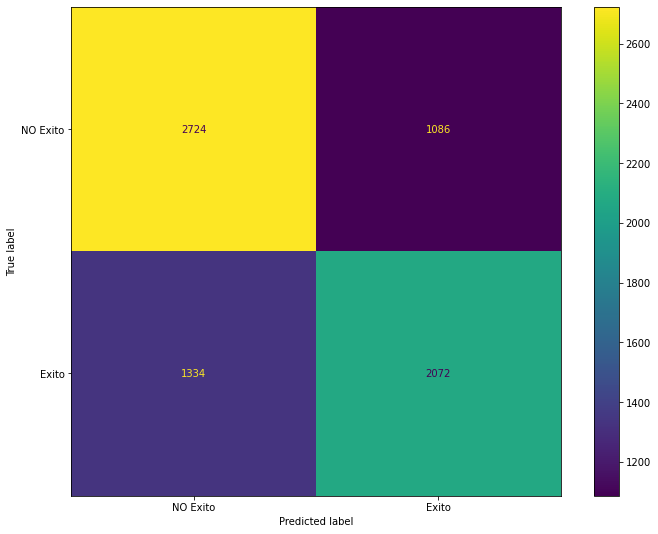

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['NO Exito','Exito'])

In [ ]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion
#confusion.ravel()

array([[2724, 1086],
       [1334, 2072]])

2. Accuracy

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.6646341463414634

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y_test, preds) 

0.656111462951235

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y_test, preds) 

0.6083382266588373

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y_test, preds) 

0.631322364411944

6. Classification_report

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      3810
           1       0.66      0.61      0.63      3406

    accuracy                           0.66      7216
   macro avg       0.66      0.66      0.66      7216
weighted avg       0.66      0.66      0.66      7216



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelo.predict_proba(X_test)[:,1]
y_score1

array([0.47, 0.43, 0.39, ..., 0.63, 0.16, 0.49])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.7156539024078244


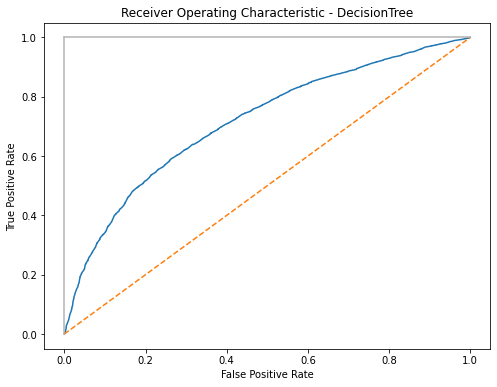

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
modelo.feature_importances_

array([0.10184748, 0.11495564, 0.10865827, 0.01663555, 0.06131434,
       0.05425519, 0.09612356, 0.107268  , 0.01285502, 0.10204307,
       0.10502826, 0.11901562])

In [ ]:
len(modelo.feature_importances_)

12

In [ ]:
len(X_train.columns)

12

<BarContainer object of 12 artists>

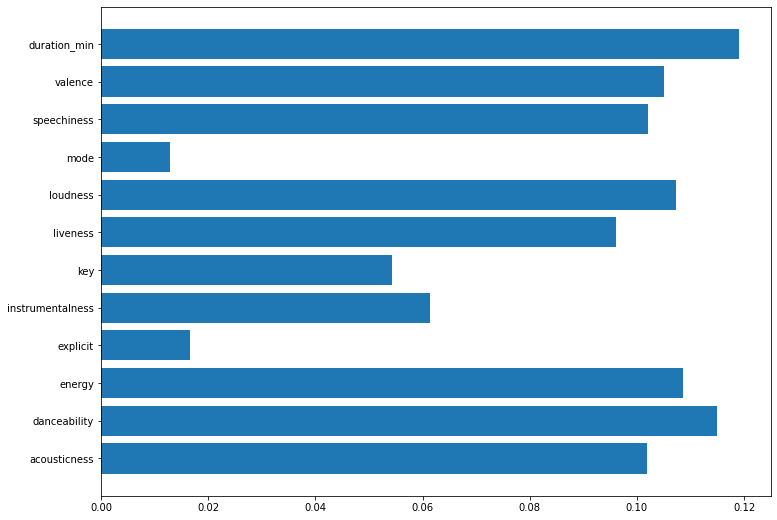

In [ ]:
plt.barh(X_train.columns, modelo.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

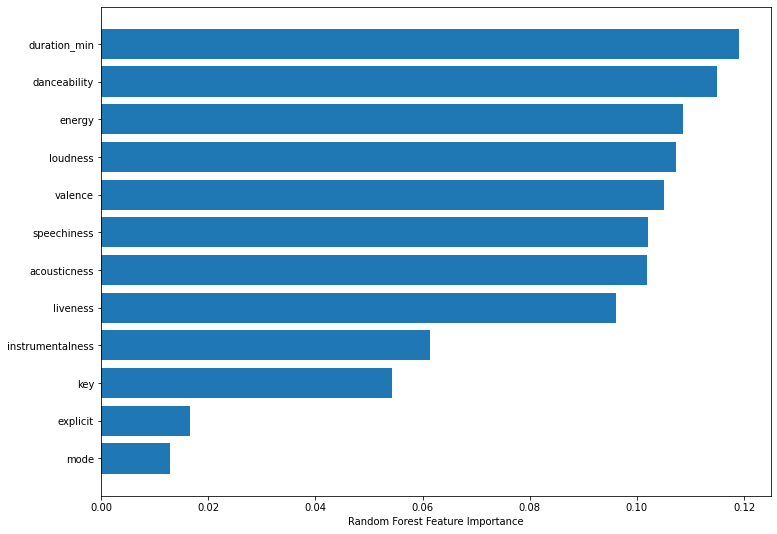

In [ ]:
sorted_idx = modelo.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], modelo.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

**Conclusión random forest:** 

Realizamos un modelo basado en la última década (años 2010 a 2020) ya que se observa que son los años más significativos en cuanto a popularidad. Definimos la variable objetivo (éxitos o no éxitos) en base al promedio de la década, es decir se va a considerar que un track es un éxito si supera los 60 puntos de popularidad.

Luego, se tomaron las variables o características que durante el EDA analizamos que influian en la popularidad: acousticness, danceability, energy, explicit, instrumentalness, key, liveness, loudness, mode, speechiness, valence, duration_min.

De este modelo se obtuvo un accuracy de 66,46% aproximadamente y luego se ordenaron las variables por importancia en el modelo. De esto último, se observo que la variable mode no era tan relevante para la predicción, por lo que se extrajo.

También utilizamos PCA (Principal Component Analysis) para poder identificar las variables principales:

In [ ]:
X_train.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'valence', 'duration_min'],
      dtype='object')

In [ ]:
#Normalizamos los datos para que PCA funcione mejor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.25313455, 0.13833302, 0.11056953, 0.09230721, 0.08826052,
       0.07230915, 0.063307  , 0.05725019, 0.04860991, 0.03527076,
       0.02680533, 0.01384282])

Considerando el análisis PCA y tomando las 5 variables de mayor importancia:

### 2. Random forest (default, 70/30, 5 variables principales)

In [ ]:
# Cargamos dataset de spotify
data2 = A.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)

# definimos matriz de diseño X y vector respuesta y
X2 = data2[['acousticness', 'danceability', 'energy', 'explicit','instrumentalness']]
y2 = data2['target']

# Separamos en entrenamiento/test en razon 70/30 %
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelo2 = RandomForestClassifier(random_state=1)
modelo2.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
preds2 = modelo2.predict(X2_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
X2.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness'],
      dtype='object')

In [ ]:
pd.DataFrame(y2_test)['target'].value_counts()

0    3810
1    3406
Name: target, dtype: int64

**Métricas**

1. Matriz de confusión:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

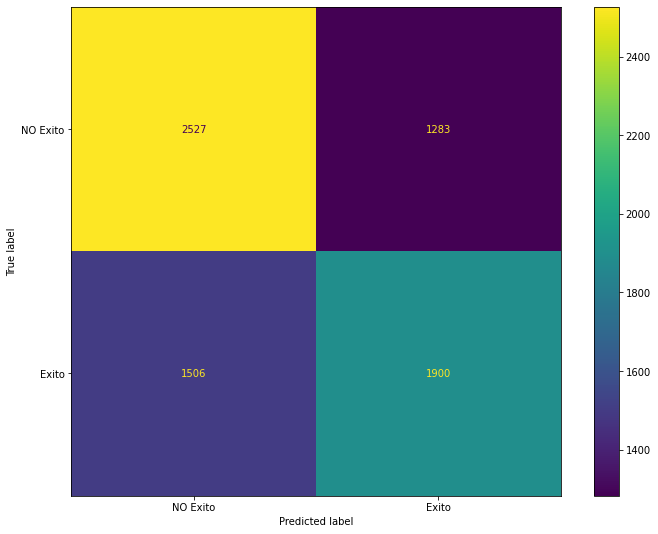

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo2, X2_test, y2_test, display_labels=['NO Exito','Exito'])

In [ ]:
confusion = metrics.confusion_matrix(y2_test, preds2)
confusion
#confusion.ravel()

array([[2527, 1283],
       [1506, 1900]])

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y2_test, preds2)
accuracy 

0.6134977827050998

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y2_test, preds2) 

0.5969211435752435

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y2_test, preds2) 

0.557839107457428

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y2_test, preds2) 

0.5767187737137653

6. Classification_report

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y2_test, preds2))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      3810
           1       0.60      0.56      0.58      3406

    accuracy                           0.61      7216
   macro avg       0.61      0.61      0.61      7216
weighted avg       0.61      0.61      0.61      7216



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelo2.predict_proba(X2_test)[:,1]
y_score1

array([0.41      , 0.26      , 0.37      , ..., 0.51666667, 0.25      ,
       0.56      ])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y2_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y2_test, y_score1))

roc_auc_score for DecisionTree:  0.6523088019752082


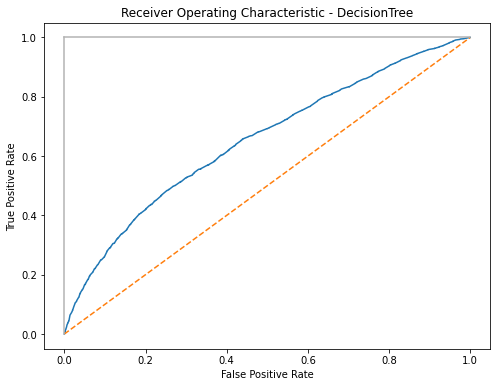

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 3. Random forest (default, 80/20, 12 variables principales)

In [ ]:
# Cargamos dataset de spotify
data2 = A.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)

# definimos matriz de diseño X y vector respuesta y
X2 = data2.drop(['target'],1)
y2 = data2['target']

# Separamos en entrenamiento/test en razon 80/20 %
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelo2 = RandomForestClassifier(random_state=1)
modelo2.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
preds2 = modelo2.predict(X2_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
X2.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'valence', 'duration_min'],
      dtype='object')

In [ ]:
pd.DataFrame(y2_test)['target'].value_counts()

0    2551
1    2260
Name: target, dtype: int64

**Métricas**

1. Matriz de confusión:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

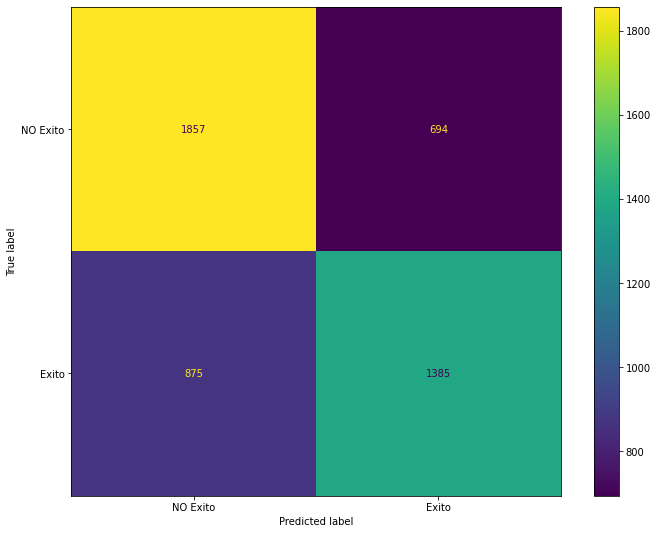

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo2, X2_test, y2_test, display_labels=['NO Exito','Exito'])

In [ ]:
confusion = metrics.confusion_matrix(y2_test, preds2)
confusion
#confusion.ravel()

array([[1857,  694],
       [ 875, 1385]])

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y2_test, preds2)
accuracy 

0.6738723758054459

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y2_test, preds2) 

0.6661856661856662

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y2_test, preds2) 

0.6128318584070797

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y2_test, preds2) 

0.6383959437658447

6. Classification_report

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y2_test, preds2))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      2551
           1       0.67      0.61      0.64      2260

    accuracy                           0.67      4811
   macro avg       0.67      0.67      0.67      4811
weighted avg       0.67      0.67      0.67      4811



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelo2.predict_proba(X2_test)[:,1]
y_score1

array([0.51      , 0.43      , 0.36      , ..., 0.485     , 0.43      ,
       0.37166667])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y2_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y2_test, y_score1))

roc_auc_score for DecisionTree:  0.7240617075379081


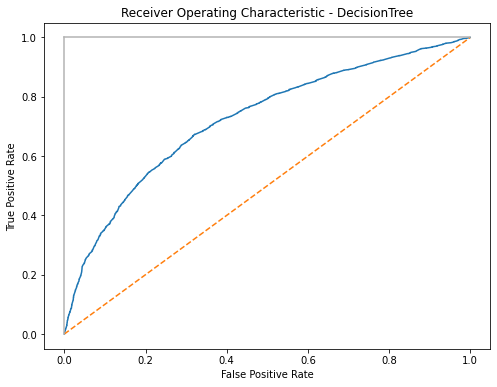

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4. Random forest (default, 80/20, 5 variables principales)

In [ ]:
# Cargamos dataset de spotify
data2 = A.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)

# definimos matriz de diseño X y vector respuesta y
X2 = data2[['acousticness', 'danceability', 'energy', 'explicit','instrumentalness']]
y2 = data2['target']

# Separamos en entrenamiento/test en razon 80/20 %
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelo2 = RandomForestClassifier(random_state=1)
modelo2.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
preds2 = modelo2.predict(X2_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
X2.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness'],
      dtype='object')

In [ ]:
pd.DataFrame(y2_test)['target'].value_counts()

0    2551
1    2260
Name: target, dtype: int64

**Métricas**

1. Matriz de confusión:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

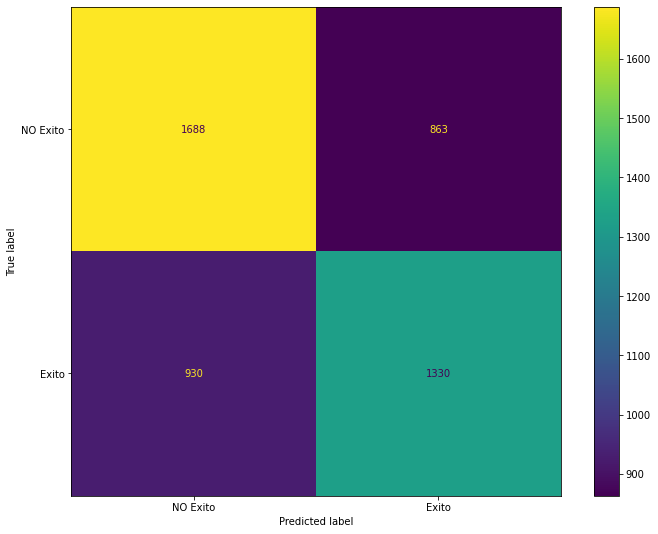

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo2, X2_test, y2_test, display_labels=['NO Exito','Exito'])

In [ ]:
confusion = metrics.confusion_matrix(y2_test, preds2)
confusion
#confusion.ravel()

array([[1688,  863],
       [ 930, 1330]])

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y2_test, preds2)
accuracy 

0.6273124090625649

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y2_test, preds2) 

0.6064751481988144

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y2_test, preds2) 

0.588495575221239

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y2_test, preds2) 

0.5973501010554683

6. Classification_report

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y2_test, preds2))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2551
           1       0.61      0.59      0.60      2260

    accuracy                           0.63      4811
   macro avg       0.63      0.63      0.63      4811
weighted avg       0.63      0.63      0.63      4811



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelo2.predict_proba(X2_test)[:,1]
y_score1

array([0.27      , 0.26      , 0.47      , ..., 0.525     , 0.48      ,
       0.44083333])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y2_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y2_test, y_score1))

roc_auc_score for DecisionTree:  0.6649692294883492


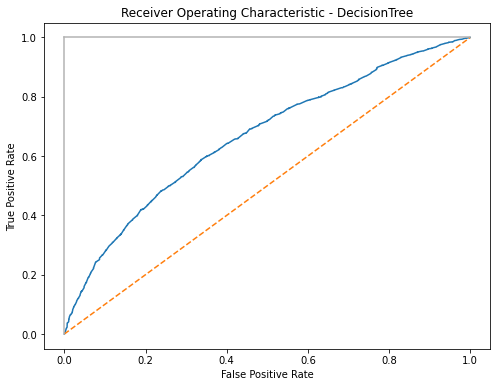

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5. Random forest (default, 90/10, 12 variables principales)

In [ ]:
# Cargamos dataset de spotify
data2 = A.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)

# definimos matriz de diseño X y vector respuesta y
X2 = data2.drop(['target'],1)
y2 = data2['target']

# Separamos en entrenamiento/test en razon 90/10 %
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.1, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelo2 = RandomForestClassifier(random_state=1)
modelo2.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
preds2 = modelo2.predict(X2_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
X2.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'valence', 'duration_min'],
      dtype='object')

In [ ]:
pd.DataFrame(y2_test)['target'].value_counts()

0    1265
1    1141
Name: target, dtype: int64

**Métricas**

1. Matriz de confusión:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

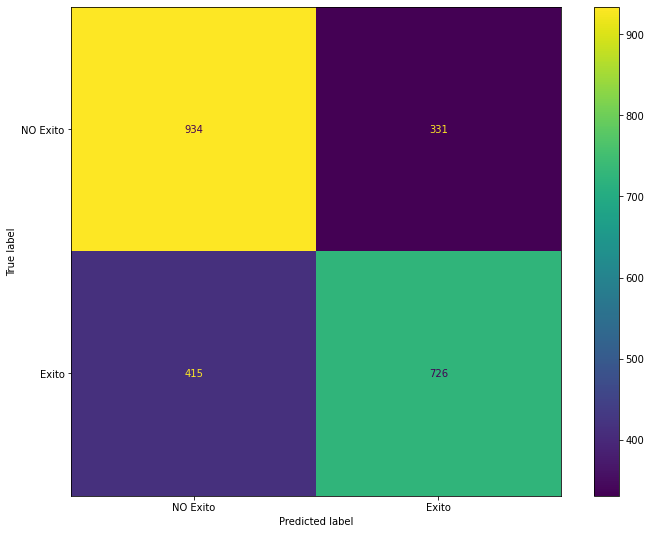

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo2, X2_test, y2_test, display_labels=['NO Exito','Exito'])

In [ ]:
confusion = metrics.confusion_matrix(y2_test, preds2)
confusion
#confusion.ravel()

array([[934, 331],
       [415, 726]])

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y2_test, preds2)
accuracy 

0.6899418121363259

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y2_test, preds2) 

0.6868495742667928

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y2_test, preds2) 

0.6362839614373357

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y2_test, preds2) 

0.6606005459508645

6. Classification_report

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y2_test, preds2))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1265
           1       0.69      0.64      0.66      1141

    accuracy                           0.69      2406
   macro avg       0.69      0.69      0.69      2406
weighted avg       0.69      0.69      0.69      2406



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelo2.predict_proba(X2_test)[:,1]
y_score1

array([0.53  , 0.49  , 0.37  , ..., 0.245 , 0.6925, 0.3965])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y2_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y2_test, y_score1))

roc_auc_score for DecisionTree:  0.7457226689021834


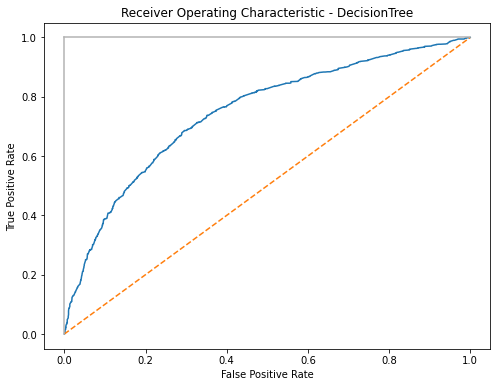

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 6. Random forest (default, 90/10, 5 variables principales)

In [ ]:
# Cargamos dataset de spotify
data2 = A.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)

# definimos matriz de diseño X y vector respuesta y
X2 = data2[['acousticness', 'danceability', 'energy', 'explicit','instrumentalness']]
y2 = data2['target']

# Separamos en entrenamiento/test en razon 90/10 %
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.1, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelo2 = RandomForestClassifier(random_state=1)
modelo2.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
preds2 = modelo2.predict(X2_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
X2.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness'],
      dtype='object')

In [ ]:
pd.DataFrame(y2_test)['target'].value_counts()

0    1265
1    1141
Name: target, dtype: int64

**Métricas**

1. Matriz de confusión:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

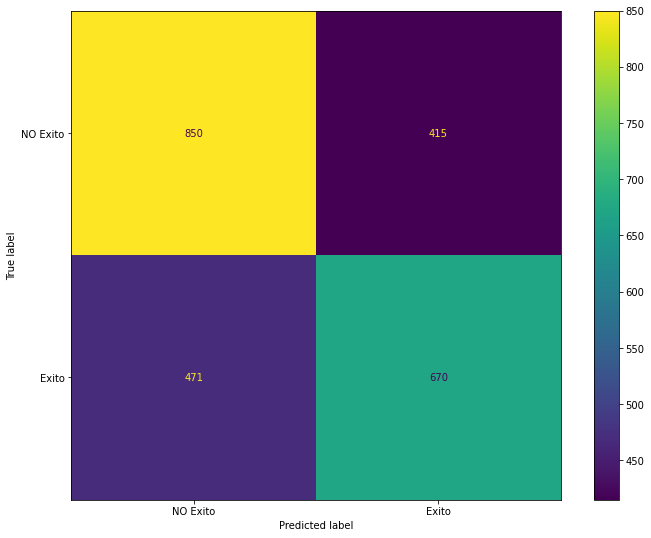

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo2, X2_test, y2_test, display_labels=['NO Exito','Exito'])

In [ ]:
confusion = metrics.confusion_matrix(y2_test, preds2)
confusion
#confusion.ravel()

array([[850, 415],
       [471, 670]])

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y2_test, preds2)
accuracy 

0.6317539484621779

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y2_test, preds2) 

0.6175115207373272

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y2_test, preds2) 

0.5872042068361086

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y2_test, preds2) 

0.6019766397124887

6. Classification_report

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y2_test, preds2))

              precision    recall  f1-score   support

           0       0.64      0.67      0.66      1265
           1       0.62      0.59      0.60      1141

    accuracy                           0.63      2406
   macro avg       0.63      0.63      0.63      2406
weighted avg       0.63      0.63      0.63      2406



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelo2.predict_proba(X2_test)[:,1]
y_score1

array([0.3       , 0.36      , 0.45433333, ..., 0.75      , 0.68      ,
       0.43      ])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y2_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y2_test, y_score1))

roc_auc_score for DecisionTree:  0.6740516085674795


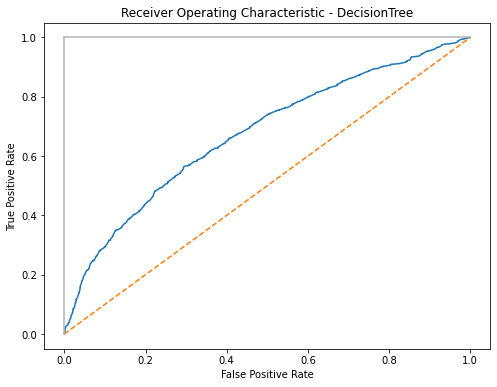

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 7. Random forest (Ajuste de parámetros, 90/10, 12 variables principales)

In [ ]:
# Cargamos dataset de spotify
data2 = A.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)

# definimos matriz de diseño X y vector respuesta y
X2 = data2.drop(['target'],1)
y2 = data2['target']

# Separamos en entrenamiento/test en razon 90/10 %
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.1, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelo2 = RandomForestClassifier(random_state=7, criterion= 'gini', max_depth=9, n_jobs=-1, max_features = 'sqrt') 
modelo2.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
preds2 = modelo2.predict(X2_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
X2.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'valence', 'duration_min'],
      dtype='object')

In [ ]:
pd.DataFrame(y2_test)['target'].value_counts()

0    1265
1    1141
Name: target, dtype: int64

**Métricas**

1. Matriz de confusión:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

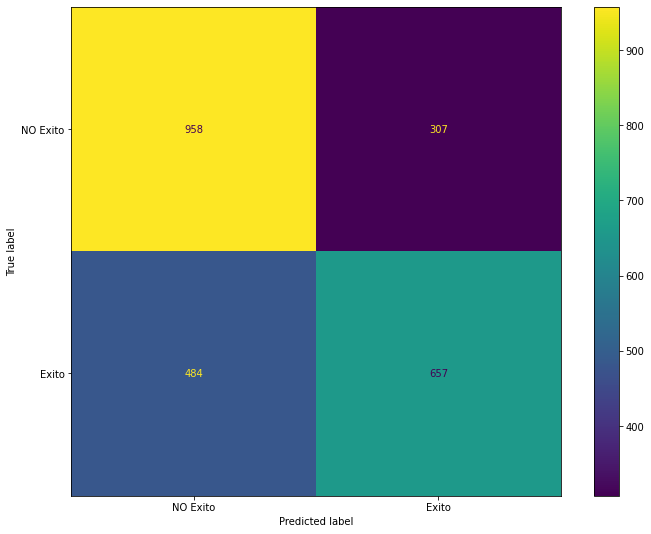

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo2, X2_test, y2_test, display_labels=['NO Exito','Exito'])

In [ ]:
confusion = metrics.confusion_matrix(y2_test, preds2)
confusion
#confusion.ravel()

array([[958, 307],
       [484, 657]])

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y2_test, preds2)
accuracy 

0.671238570241064

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y2_test, preds2) 

0.6815352697095436

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y2_test, preds2) 

0.5758106923751095

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y2_test, preds2) 

0.6242280285035628

6. Classification_report

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y2_test, preds2))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1265
           1       0.68      0.58      0.62      1141

    accuracy                           0.67      2406
   macro avg       0.67      0.67      0.67      2406
weighted avg       0.67      0.67      0.67      2406



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelo2.predict_proba(X2_test)[:,1]
y_score1

array([0.37482656, 0.34522711, 0.3704109 , ..., 0.2522197 , 0.60410715,
       0.50004954])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y2_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y2_test, y_score1))

roc_auc_score for DecisionTree:  0.7300149303883633


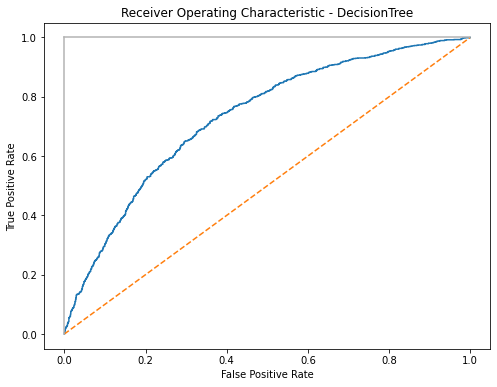

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 8. SVM (Clasificación) - 70/30

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargamos dataset de spotify
data3 = A

# División de los datos en train y test
X3 = data3.drop(['target','artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year','mode'],1)
y3 = data3['target']

# Separamos en train y test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,train_size= 0.30,random_state = 1)


In [ ]:
# Creación del modelo SVM y ajuste del modelo
modelo3 = SVC(C=0.1,kernel='rbf',random_state=1,probability=True)
modelo3.fit(X3_train, y3_train)

SVC(C=0.1, probability=True, random_state=1)

In [ ]:
#Predicciones
y3_pred = modelo3.predict(X3_test)

In [ ]:
X3_test.shape

(16837, 11)

**Métricas**

1. Matriz de confusión:

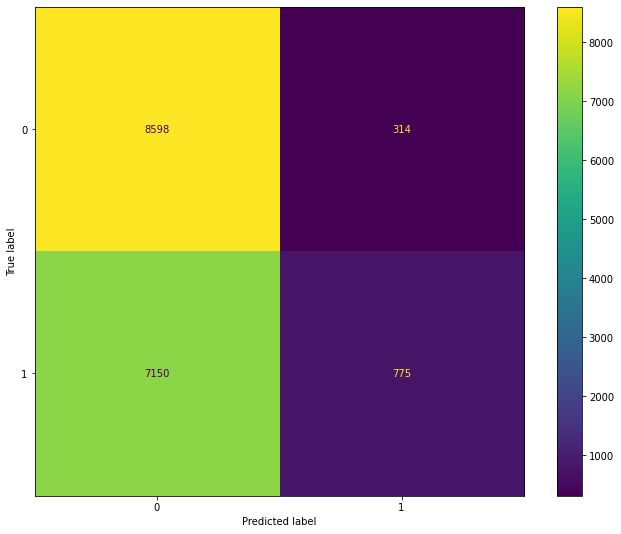

In [ ]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelo3,X3_test, y3_test)

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y3_test, y3_pred)
accuracy 

0.5566906218447467

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y3_test, y3_pred) 

0.711662075298439

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y3_test, y3_pred) 

0.09779179810725552

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y3_test, y3_pred) 

0.1719547370756601

6. Classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y3_pred, y_true= y3_test))

              precision    recall  f1-score   support

           0       0.55      0.96      0.70      8912
           1       0.71      0.10      0.17      7925

    accuracy                           0.56     16837
   macro avg       0.63      0.53      0.43     16837
weighted avg       0.62      0.56      0.45     16837



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelo3.predict_proba(X3_test)[:,1]
y_score1

array([0.39041142, 0.32910538, 0.37729887, ..., 0.64110759, 0.29667851,
       0.33314865])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y3_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y3_test, y_score1))

roc_auc_score for DecisionTree:  0.6315739385169538


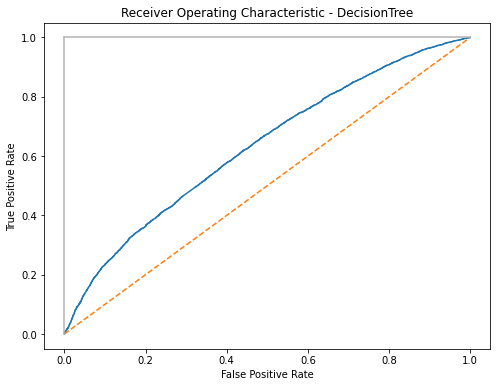

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Conclusión SVM:**

De este modelo se obtuvo un accuracy de 55,67% aproximadamente. Comparando los ROCs en ambos, se observa un 0.71 en el random forest mientras que se obtuvo un 0.63 en el SVM. Adicionalmente, todas las métricas que utilizamos disminuyen con respecto al random forest, por lo que este último sería un mejor método de clasificación que el SVM.

### 9. SVM (Clasificación) - 80/20

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargamos dataset de spotify
data3 = A

# División de los datos en train y test
X3 = data3.drop(['target','artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year','mode'],1)
y3 = data3['target']

# Separamos en train y test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,train_size= 0.20,random_state = 1)


In [ ]:
# Creación del modelo SVM y ajuste del modelo
modelo3 = SVC(C=0.1,kernel='rbf',random_state=1,probability=True)
modelo3.fit(X3_train, y3_train)

SVC(C=0.1, probability=True, random_state=1)

In [ ]:
#Predicciones
y3_pred = modelo3.predict(X3_test)

In [ ]:
X3_test.shape

(19242, 11)

**Métricas**

1. Matriz de confusión:

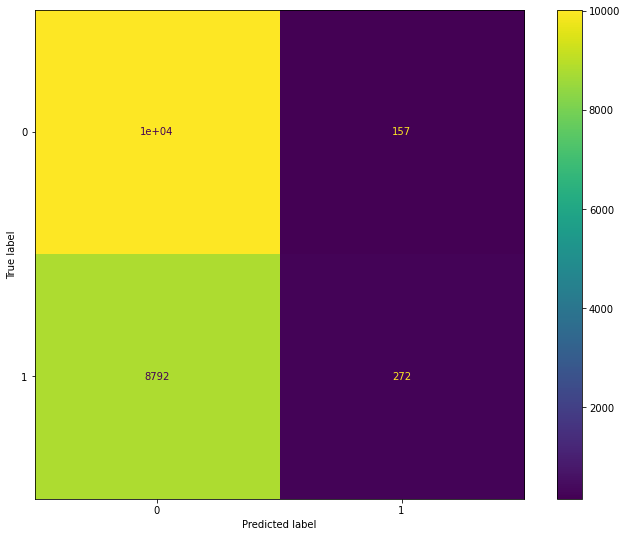

In [ ]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelo3,X3_test, y3_test)

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y3_test, y3_pred)
accuracy 

0.5349236046149048

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y3_test, y3_pred) 

0.634032634032634

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y3_test, y3_pred) 

0.03000882612533098

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y3_test, y3_pred) 

0.0573053829137259

6. Classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y3_pred, y_true= y3_test))

              precision    recall  f1-score   support

           0       0.53      0.98      0.69     10178
           1       0.63      0.03      0.06      9064

    accuracy                           0.53     19242
   macro avg       0.58      0.51      0.37     19242
weighted avg       0.58      0.53      0.39     19242



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelo3.predict_proba(X3_test)[:,1]
y_score1

array([0.4433323 , 0.37082955, 0.42077506, ..., 0.47170401, 0.64132373,
       0.46978605])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y3_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y3_test, y_score1))

roc_auc_score for DecisionTree:  0.6301586883656267


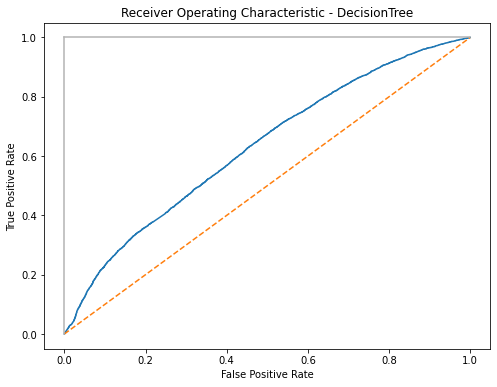

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 10. SVM (Clasificación) - 90/10




In [ ]:
# Cargamos dataset de spotify
data3 = A

# División de los datos en train y test
X3 = data3.drop(['target','artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year','mode'],1)
y3 = data3['target']

# Separamos en train y test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,train_size= 0.10,random_state = 1)


In [ ]:
# Creación del modelo SVM y ajuste del modelo
modelo3 = SVC(C=0.1,kernel='rbf',random_state=1,probability=True)
modelo3.fit(X3_train, y3_train)

SVC(C=0.1, probability=True, random_state=1)

In [ ]:
#Predicciones
y3_pred = modelo3.predict(X3_test)

In [ ]:
X3_test.shape

(21647, 11)

**Métricas**

1. Matriz de confusión:

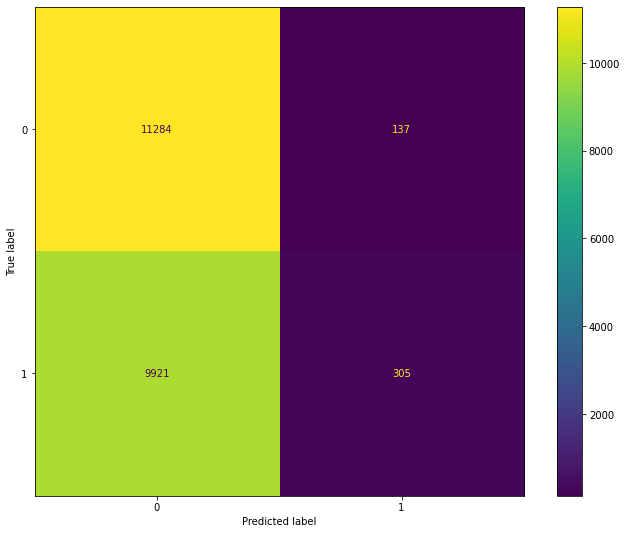

In [ ]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelo3,X3_test, y3_test)

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y3_test, y3_pred)
accuracy 

0.53536286783388

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y3_test, y3_pred) 

0.6900452488687783

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y3_test, y3_pred) 

0.029825933893995696

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y3_test, y3_pred) 

0.057180352455943

6. Classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y3_pred, y_true= y3_test))

              precision    recall  f1-score   support

           0       0.53      0.99      0.69     11421
           1       0.69      0.03      0.06     10226

    accuracy                           0.54     21647
   macro avg       0.61      0.51      0.37     21647
weighted avg       0.61      0.54      0.39     21647



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelo3.predict_proba(X3_test)[:,1]
y_score1

array([0.45110866, 0.42050814, 0.42519358, ..., 0.42467356, 0.43781425,
       0.45475134])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y3_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y3_test, y_score1))

roc_auc_score for DecisionTree:  0.6291240433585608


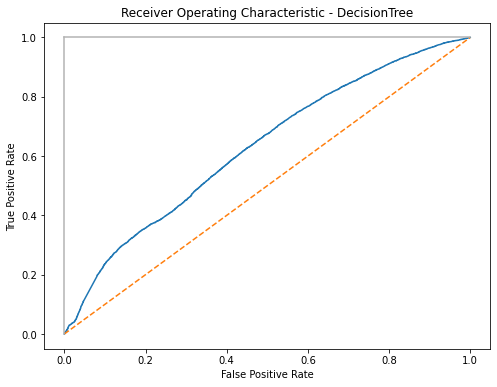

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 11. Xboost - 70/30




In [ ]:
# Cargamos dataset de spotify
data3 = A

# División de los datos en train y test
X3 = data3.drop(['target','artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year','mode'],1)
y3 = data3['target']

# Separamos en train y test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,train_size= 0.30,random_state = 1)


In [ ]:
import xgboost as xgb

# Creación del modelo SVM y ajuste del modelo
xboost= xgb.XGBClassifier(random_state=7)
xboost.fit(X3_train, y3_train)

XGBClassifier(random_state=7)

In [ ]:
#Predicciones
y3_pred = xboost.predict(X3_test)

In [ ]:
X3_test.shape

(16837, 11)

**Métricas**

1. Matriz de confusión:

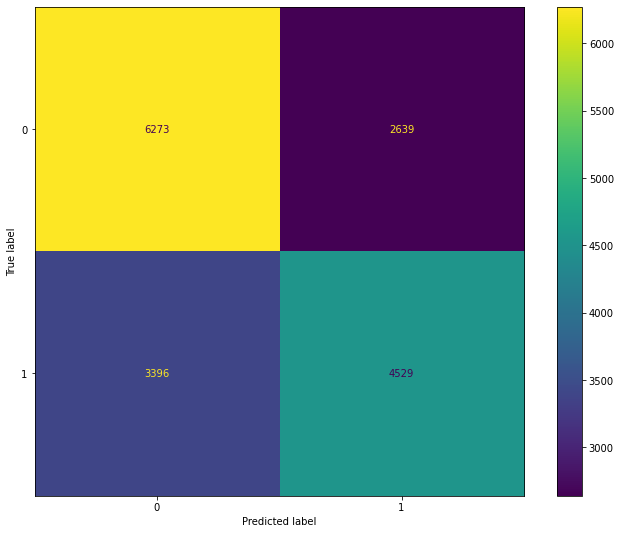

In [ ]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xboost,X3_test, y3_test)

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y3_test, y3_pred)
accuracy 

0.6415632238522302

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y3_test, y3_pred) 

0.6318359375

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y3_test, y3_pred) 

0.5714826498422713

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y3_test, y3_pred) 

0.6001457629364607

6. Classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y3_pred, y_true= y3_test))

              precision    recall  f1-score   support

           0       0.65      0.70      0.68      8912
           1       0.63      0.57      0.60      7925

    accuracy                           0.64     16837
   macro avg       0.64      0.64      0.64     16837
weighted avg       0.64      0.64      0.64     16837



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = xboost.predict_proba(X3_test)[:,1]
y_score1

array([0.3962143 , 0.332063  , 0.47765702, ..., 0.5820048 , 0.24616443,
       0.13340268], dtype=float32)

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y3_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y3_test, y_score1))

roc_auc_score for DecisionTree:  0.6932888629940703


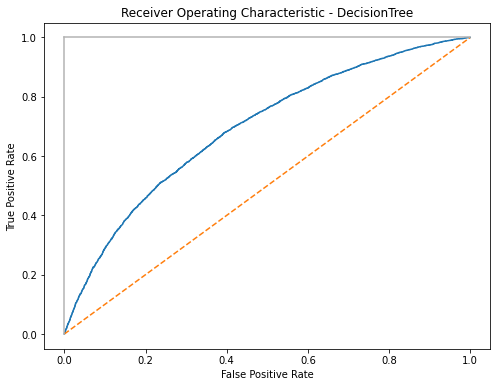

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 11. Xboost - 90/10




In [ ]:
# Cargamos dataset de spotify
data3 = A

# División de los datos en train y test
X3 = data3.drop(['target','artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year','mode'],1)
y3 = data3['target']

# Separamos en train y test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,train_size= 0.10,random_state = 1)


In [ ]:
import xgboost as xgb

# Creación del modelo SVM y ajuste del modelo
xboost= xgb.XGBClassifier(random_state=7)
xboost.fit(X3_train, y3_train)

XGBClassifier(random_state=7)

In [ ]:
#Predicciones
y3_pred = xboost.predict(X3_test)

In [ ]:
X3_test.shape

(21647, 11)

**Métricas**

1. Matriz de confusión:

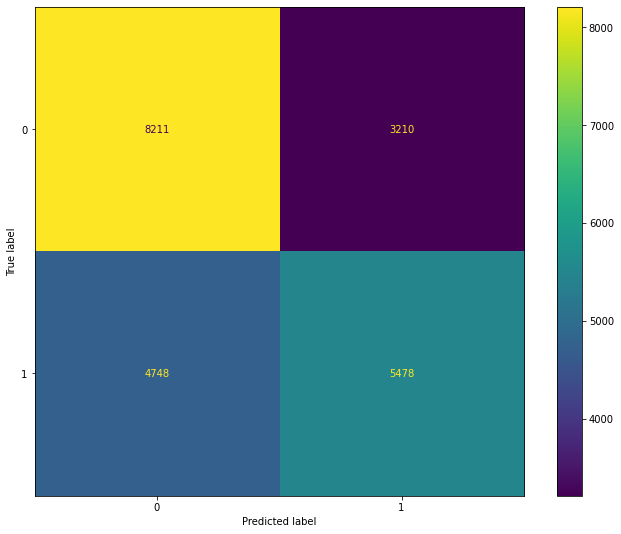

In [ ]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xboost,X3_test, y3_test)

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y3_test, y3_pred)
accuracy 

0.6323740010163071

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y3_test, y3_pred) 

0.630524861878453

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y3_test, y3_pred) 

0.5356933307256014

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y3_test, y3_pred) 

0.5792534630432483

6. Classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y3_pred, y_true= y3_test))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67     11421
           1       0.63      0.54      0.58     10226

    accuracy                           0.63     21647
   macro avg       0.63      0.63      0.63     21647
weighted avg       0.63      0.63      0.63     21647



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = xboost.predict_proba(X3_test)[:,1]
y_score1

array([0.34325156, 0.2926158 , 0.35851273, ..., 0.42262444, 0.64636534,
       0.61199474], dtype=float32)

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y3_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y3_test, y_score1))

roc_auc_score for DecisionTree:  0.6788211582408824


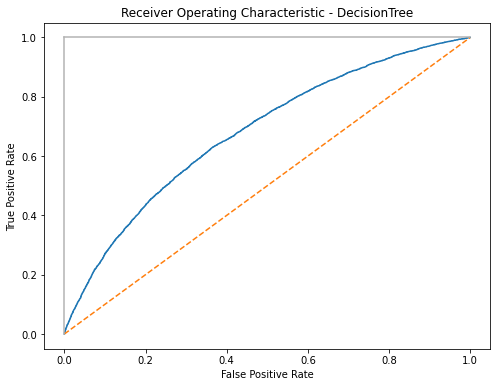

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 13. GradientBoostingClassifier - 70/30




In [ ]:
# Cargamos dataset de spotify
data3 = A

# División de los datos en train y test
X3 = data3.drop(['target','artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year','mode'],1)
y3 = data3['target']

# Separamos en train y test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,train_size= 0.30,random_state = 1)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Creación del modelo y ajuste del modelo
gbrt = GradientBoostingClassifier(random_state = 7)
gbrt.fit(X3_train, y3_train)

GradientBoostingClassifier(random_state=7)

In [ ]:
#Predicciones
y3_pred = gbrt.predict(X3_test)

In [ ]:
X3_test.shape

(16837, 11)

**Métricas**

1. Matriz de confusión:

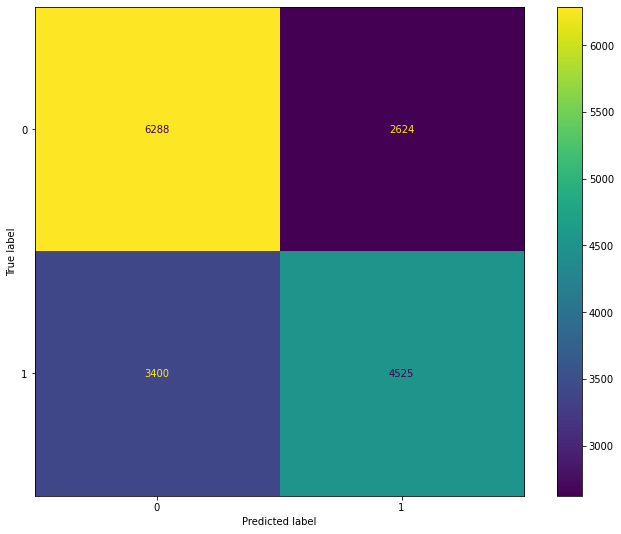

In [ ]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbrt,X3_test, y3_test)

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(y3_test, y3_pred)
accuracy 

0.6422165468907762

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(y3_test, y3_pred) 

0.6329556581340048

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(y3_test, y3_pred) 

0.5709779179810726

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y3_test, y3_pred) 

0.6003715005970546

6. Classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y3_pred, y_true= y3_test))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      8912
           1       0.63      0.57      0.60      7925

    accuracy                           0.64     16837
   macro avg       0.64      0.64      0.64     16837
weighted avg       0.64      0.64      0.64     16837



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = gbrt.predict_proba(X3_test)[:,1]
y_score1

array([0.40944684, 0.36299922, 0.46198095, ..., 0.59398367, 0.245991  ,
       0.1401176 ])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y3_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y3_test, y_score1))

roc_auc_score for DecisionTree:  0.6920770208813553


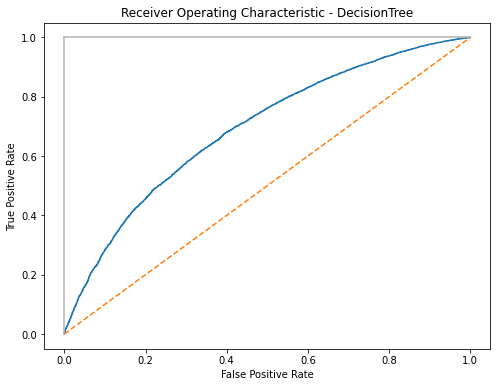

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Comparativo de modelos y creación de variable sintética

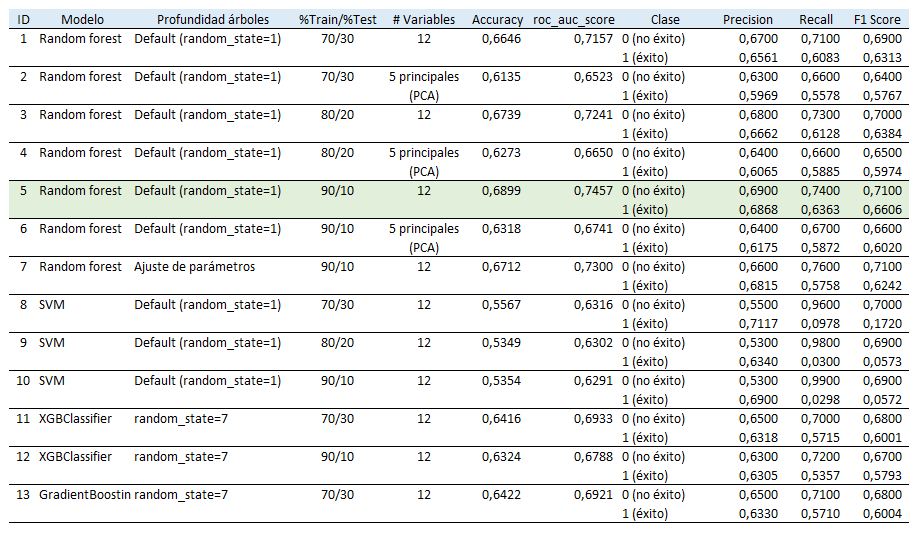

De todos los modelos, el que obtuvo las mejores métricas fue el random forest, con los parámetros en default (random_state=1), entrenando 90%/10% y con la totalidad de las 12 variables: 'acousticness', 'danceability', 'energy', 'explicit',       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'duration_min'

Creamos una nueva variable que cuente la cantidad de hits que tienen los artistas para poder mejorar el rendimiento del modelo. Entendemos que ciertos artistas tienen más popularidad que otros y esto podría ser una variable explicativa:

**Creación de variable sintética**

Filtramos en la base los éxitos, es decir cuando la variable target es 1 (supera la popularidad promedio de la década)

In [ ]:
B=A[A['target']==1]

Contamos la cantidad la cantidad de éxitos por artista:

In [ ]:
C=B[['artists','target']].groupby('artists').count().sort_values(by='target',ascending=False)
C

,target
artists,
['BTS'],94
['One Direction'],83
['Drake'],66
['Lil Uzi Vert'],57
['The Weeknd'],52
...,...
"['Kane Brown', 'Becky G']",1
"['Kane Brown', 'John Legend']",1
"['Kane Brown', 'Lauren Alaina']",1


In [ ]:
C=C.rename(columns={'target':'cant de hits'})
C

,cant de hits
artists,
['BTS'],94
['One Direction'],83
['Drake'],66
['Lil Uzi Vert'],57
['The Weeknd'],52
...,...
"['Kane Brown', 'Becky G']",1
"['Kane Brown', 'John Legend']",1
"['Kane Brown', 'Lauren Alaina']",1


In [ ]:
B['artists'].unique()

array(["['Canserbero']", "['Pendulum']", "['Bunbury', 'Miren Iza']", ...,
       'NEEKA', 'AWOLNATION', 'Robin Schulz'], dtype=object)

In [ ]:
B[B['artists']=="['BTS']"]

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,popularity,speechiness,tempo,valence,year,duration_min,Decadas,Instrumental,Danzable,target
4895,0.0487,['BTS'],0.636,0.876,0,645YBsxhFPSOKxGep3uHLv,0.000000,9,0.0728,-4.652,...,70,0.0617,149.932,0.759,2018,3.692224,Dos mil 10,1,3,1
4896,0.0223,['BTS'],0.599,0.774,0,6Z7m5DLNPOaPg9T6nXK0rQ,0.000000,1,0.0669,-4.014,...,72,0.0541,129.819,0.696,2018,3.718791,Dos mil 10,1,3,1
9608,0.0483,['BTS'],0.619,0.889,0,6dr6QeqH62tYUiPezRbinq,0.000000,10,0.3240,-3.108,...,63,0.2190,77.058,0.622,2015,4.000430,Dos mil 10,1,3,1
9632,0.0808,['BTS'],0.704,0.959,0,1pePqg6hTMeaTZNNECqT03,0.000000,1,0.3830,-2.607,...,62,0.1920,116.024,0.751,2015,4.069348,Dos mil 10,1,3,1
9674,0.0215,['BTS'],0.486,0.880,0,3RlcLpMmRvSd84Uw6Yt4Iw,0.000000,5,0.2400,-3.097,...,62,0.0706,158.043,0.710,2015,3.516520,Dos mil 10,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96487,0.0121,['BTS'],0.808,0.903,0,3r9FFjLrAIQjoR8pSHVPC9,0.000233,0,0.0993,-3.106,...,73,0.0958,116.988,0.473,2020,3.270049,Dos mil 10,1,4,1
101298,0.2900,['BTS'],0.509,0.558,0,7L8hkKW4hnemNfuOfEZcle,0.000000,2,0.1310,-6.369,...,72,0.0276,135.879,0.327,2018,4.006113,Dos mil 10,1,3,1
101394,0.1250,['BTS'],0.580,0.858,0,5hnbE5BF2e8BCk9OMR1UVC,0.000000,8,0.0502,-5.212,...,74,0.1140,174.039,0.475,2019,3.737158,Dos mil 10,1,3,1
101455,0.0142,['BTS'],0.633,0.799,0,7lthOBXNue2IvedLRfkod8,0.000000,7,0.1940,-4.625,...,73,0.0429,142.991,0.535,2019,3.903045,Dos mil 10,1,3,1


Unimos la base con la agrupación de éxitos por artistas

In [ ]:
Base=A.merge(C, how='left',on='artists')

In [ ]:
Base.head(5)

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,valence,year,duration_min,Decadas,Instrumental,Danzable,target,cant de hits
0,0.022200,['Tame Impala'],0.450,0.849,0,4m3GHOgCNZMv0we7H9j8Y8,0.00455,5,0.0792,-5.075,...,0.0570,139.925,0.1610,2010,6.048121,Dos mil 10,1,2,0,20.0
1,0.000103,['Bring Me The Horizon'],0.382,0.943,0,0ZxZsjMMyLgjRV1XLWlIaS,0.00011,8,0.3960,-5.434,...,0.0872,105.032,0.1280,2010,4.568975,Dos mil 10,1,2,0,7.0
2,0.852000,['Daft Punk'],0.179,0.167,0,0Jc2SfIHv63JNsUZpunh54,0.74800,1,0.1060,-23.408,...,0.0394,124.266,0.0399,2010,2.702054,Dos mil 10,3,1,0,1.0
3,0.080900,['TobyMac'],0.507,0.770,0,5QZunYrvUrJs3Mzrjl7fKV,0.00000,0,0.2140,-5.018,...,0.0424,155.945,0.4820,2010,4.442539,Dos mil 10,1,3,0,NaN
4,0.002960,['Kenny Chesney'],0.315,0.925,0,0X0zDB7RqpWOIwCHGr2Whu,0.06420,0,0.1140,-4.507,...,0.1170,185.305,0.4150,2010,3.510737,Dos mil 10,1,2,0,9.0


Hay ciertos artistas que no tienen éxitos, por lo que reemplazamos los NaN por 0:

In [ ]:
Base['cant de hits'].fillna(0, inplace=True)

In [ ]:
Base.head(5)

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,valence,year,duration_min,Decadas,Instrumental,Danzable,target,cant de hits
0,0.022200,['Tame Impala'],0.450,0.849,0,4m3GHOgCNZMv0we7H9j8Y8,0.00455,5,0.0792,-5.075,...,0.0570,139.925,0.1610,2010,6.048121,Dos mil 10,1,2,0,20.0
1,0.000103,['Bring Me The Horizon'],0.382,0.943,0,0ZxZsjMMyLgjRV1XLWlIaS,0.00011,8,0.3960,-5.434,...,0.0872,105.032,0.1280,2010,4.568975,Dos mil 10,1,2,0,7.0
2,0.852000,['Daft Punk'],0.179,0.167,0,0Jc2SfIHv63JNsUZpunh54,0.74800,1,0.1060,-23.408,...,0.0394,124.266,0.0399,2010,2.702054,Dos mil 10,3,1,0,1.0
3,0.080900,['TobyMac'],0.507,0.770,0,5QZunYrvUrJs3Mzrjl7fKV,0.00000,0,0.2140,-5.018,...,0.0424,155.945,0.4820,2010,4.442539,Dos mil 10,1,3,0,0.0
4,0.002960,['Kenny Chesney'],0.315,0.925,0,0X0zDB7RqpWOIwCHGr2Whu,0.06420,0,0.1140,-4.507,...,0.1170,185.305,0.4150,2010,3.510737,Dos mil 10,1,2,0,9.0


Probamos el modelo que nos dio las mejores métricas con la nueva variable sintética:

### 14. Random forest (default, 90/10, 13 variables principales, incluyendo variable sintética)

In [ ]:
# Cargamos dataset de spotify
dataf = Base.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)

# definimos matriz de diseño X y vector respuesta y
Xf = dataf.drop(['target'],1)
yf = dataf['target']

# Separamos en entrenamiento/test en razon 90/10 %
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf,yf,test_size=0.1, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelof = RandomForestClassifier(random_state=1)
modelof.fit(Xf_train, yf_train)
# Obtenemos las predicciones del modelo con X_test
predsf = modelof.predict(Xf_test) 

In [ ]:
Xf.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'valence', 'duration_min', 'cant de hits'],
      dtype='object')

In [ ]:
pd.DataFrame(yf_test)['target'].value_counts()

0    1265
1    1141
Name: target, dtype: int64

**Métricas**

1. Matriz de confusión:

<Figure size 720x432 with 0 Axes>

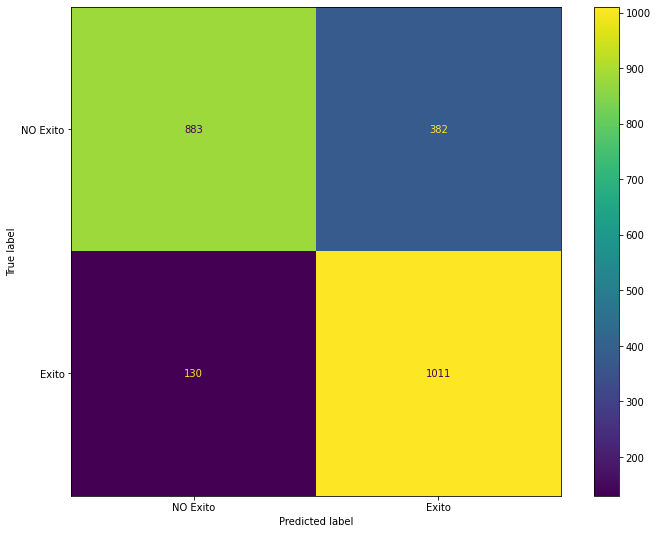

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelof, Xf_test, yf_test, display_labels=['NO Exito','Exito'])

In [ ]:
confusion = metrics.confusion_matrix(yf_test, predsf)
confusion
#confusion.ravel()

array([[ 883,  382],
       [ 130, 1011]])

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(yf_test, predsf)
accuracy 

0.7871986699916874

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(yf_test, predsf) 

0.7257717157214645

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(yf_test, predsf) 

0.8860648553900088

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(yf_test, predsf) 

0.7979479084451461

6. Classification_report

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(yf_test, predsf))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1265
           1       0.73      0.89      0.80      1141

    accuracy                           0.79      2406
   macro avg       0.80      0.79      0.79      2406
weighted avg       0.80      0.79      0.79      2406



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelof.predict_proba(Xf_test)[:,1]
y_score1

array([0.77  , 0.02  , 0.485 , ..., 0.02  , 0.7825, 0.75  ])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(yf_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(yf_test, y_score1))

roc_auc_score for DecisionTree:  0.8698257197590353


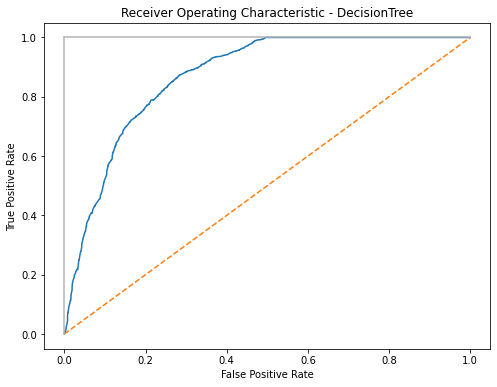

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
modelof.feature_importances_

array([0.06752416, 0.07506143, 0.06783532, 0.01127609, 0.03813977,
       0.03414314, 0.05984297, 0.06563402, 0.00845014, 0.06780231,
       0.06486171, 0.07566928, 0.36375965])

In [ ]:
len(modelof.feature_importances_)

13

In [ ]:
len(Xf_train.columns)

13

<BarContainer object of 13 artists>

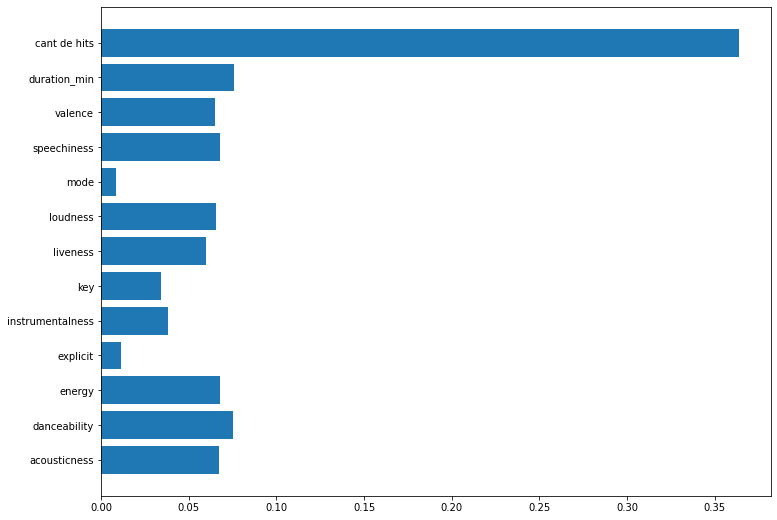

In [ ]:
plt.barh(Xf_train.columns, modelof.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

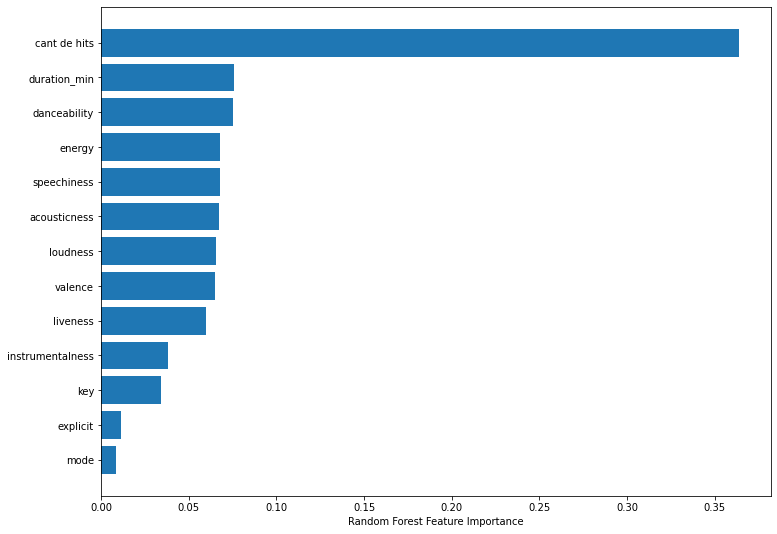

In [ ]:
sorted_idx = modelof.feature_importances_.argsort()
plt.barh(Xf_train.columns[sorted_idx], modelof.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## **Conclusión**

De todos los modelos de clasificación, el que obtuvo las mejores métricas fue el random forest, con los parámetros en default (random_state=1), entrenando 90%/10% y con la totalidad de las 12 variables: 'acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'duration_min'.

Luego, creamos una variable sintética que cuente la cantidad de hits que tienen los artistas para poder mejorar el rendimiento del modelo. Entendemos que ciertos artistas tienen más popularidad que otros y esto podría ser una variable explicativa.

Probamos el modelo con el que obtuvimos mejores métricas con esta nueva variable y mejoró significativamente, obteniendose un accuracy de 78,72% y el ROC de 86,98%. Se puede observar que esta variable explica gran parte del modelo como habíamos supuesto.